# Project 2: An Examination of New York City's Math Regents Data from 2014-2017

#### Proposal
For Project 2, I would like to look at the New York State Regents Scores for New York City.  I found the dataset on nydata.gov <https://data.cityofnewyork.us/Education/2014-2017-Regents/cbrh-qrk4/data>.  The dataset is a free and legal csv file that is 3.3 MB with 19.4K rows and 17 columns. I also verified that my dataset was not used for project 1. I choose this data because I went to college in New York where I grew a strong understanding of the standardize testing in the New York State Education System.  I wanted to look at the regents’ data because New York has been using the same testing format for many years; therefore, it has become well-documented.  In this particular dataset, I have information from 2014 to 2017.
  	I would like to specifically look at the math regents exams in my analysis.  There are three math exams, Algebra I, Geometry, and Algebra 2.  I would also like to look at these test not only by student outcome, but also the number of students taking the exams, and the number of students in high school, versus middle school, taking these exams.  The following is a list of questions, I would like to explore from this dataset.
* Does the student population taking each exam increase each year?
* Does the number of students taking the exams in middle/intermediate school increase each year?
* Does the percent of students passing each exam increase each year? (passing score is a 65)
* Does the mean score increase each year?
* Does the Algebra 1 regents exam have the highest passing rate?
From these questions, I formed the following hypothesizes.  
Hypothesis:

#### Hypothesis 1:
I can hypothesize that more students are taking the regents each year.  I am guessing that 25 more students are taking the math regents each year.

No

Conclusion: Less students are taking the regents each year. In fact, from 2015 to 2016 there were 26,367 less students taking the math regents, and from 2015 to 2016 there were 27,159 less students taking the math regents


#### Hypothesis 2:
I can hypothesize that more students are passing their regents each year.  My numeric guess is that there is a 2% increase in passing students each year.

No

Conclusion: More students are passing their regents each year! Specifically, from 2015 to 2016 the passing rate increased by 2.37% (very close to my hypothesis) and from 2016 to 2017 the passing rate increased by 5.23%

#### Hypothesis 3:
The data has the DBN of the schools which allows me to sort through the data by borough.  From this I can hypothesize that for each year, Manhattan has the highest passing rate, and the Bronx has the lowest passing rate.

No

Conclusion: in 2015 and 2017 Queens had the highest passing rate, and in 2016 Manhattan had the highest passing rate.  All three years, the Bronx had the lowest passing rate as I predicted in my hypothesis.  However, each year the passing rate in the Bronx did increase as can be seen in the bar graph.

##### Data Retrival
I obtained the data from <https://data.cityofnewyork.us/Education/2014-2017-Regents/cbrh-qrk4/data>.  The data has 17 columns and 19,400 rows.  I am only going to import the columns that I feel are necessary for answering my hypotheses.

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import csv file from url code
#I am only going to Import columns of the csv that I feel are pertinent to what I am examining
url = 'https://data.cityofnewyork.us/api/views/cbrh-qrk4/rows.csv?accessType=DOWNLOAD'
columns = ['School DBN', 'SchoolType', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score', 'Number Scoring 65 or Above']
df = pd.read_csv(url, usecols = columns)

##### Data Cleaning
First I looked at df.info() to see if I had any nulls.  Then I looked at the head of the dataframe and I realized that there were "s" in the Mean and Number Scoring 65 or Above columns.  I looked back at the data description on the website and the only thing that I found to validate these "s" values was, "Non-numeric marks are dropped from the data."  Based on this information I am going to change the "s"values to NAN.  This keeps the max and min values of the data what they were.  Second, "Mean Score" and "Number Scoring 65 or Above" were objects, so I changed them to float type.  Third, I am only looking at math regents, so I am going to make my dataframe have rows that only contain math regents.  Lastly, I made sure that the values in my columns made sense (ie the values made sense to what the column type was)

In [ ]:
#replace 's' with nan
df['Mean Score'] = df['Mean Score'].replace('s', np.NaN)
df['Number Scoring 65 or Above'] = df['Number Scoring 65 or Above'].replace('s', np.NaN)

#Change 'Mean Score', and 'Number Scoring 65 or Above' from object to float
df[["Mean Score", "Number Scoring 65 or Above"]] = df[["Mean Score", "Number Scoring 65 or Above"]].apply(pd.to_numeric)
df['Year'] = df['Year'].astype(str)

#drop all the regents exams that are not math exams.
#first drop Regents Exams that are Nan
df.dropna(subset = ["Regents Exam"], inplace=True)
#Use Regents Exams that are not Math Regents
df = df[(df['Regents Exam'] == 'Algebra2/Trigonometry') |
        (df['Regents Exam'] == 'Common Core Algebra') |
        (df['Regents Exam'] == 'Common Core Algebra2') |
        (df['Regents Exam'] == 'Common Core Geometry') |
        (df['Regents Exam'] == 'Geometry') |
        (df['Regents Exam'] == 'Integrated Algebra')]
df.reset_index(inplace = True)
df.head()

##### Observation From Data Cleaning
Now that my data is clean, I noticed that there are some rows where there are null values for the mean score and number scoring 65 or above.  I want to keep this data because students still took the exams, their scores seem to have not been reported.

#### Hypothesis 1:
I can hypothesize that more students are taking the regents each year.  I am guessing that 25 more students are taking the math regents each year.

Process: To test this hypothesis, I am first going to look at a bar chart of the number of students tested each year.  Upon Looking at the bar chart I can immediately informed that my hypothesis is incorrect, and less students are taking math regents each year.  I am now going to find the decrease for each year.

Conclusion: Less students are taking the regents each year.  In fact, from 2015 to 2016 there were 26,367 less students taking the math regents, and from 2015 to 2016 there were 27,159 less students taking the math regents

In [4]:
# I am first going to do a groupby with Years
year_groups = df.groupby("Year")
# Now I am going to sum each group
total_by_year = year_groups['Total Tested'].sum()
total_by_year

Year
2015    268122
2016    241755
2017    214596
Name: Total Tested, dtype: int64

Text(0, 0.5, 'Total Number of Students')

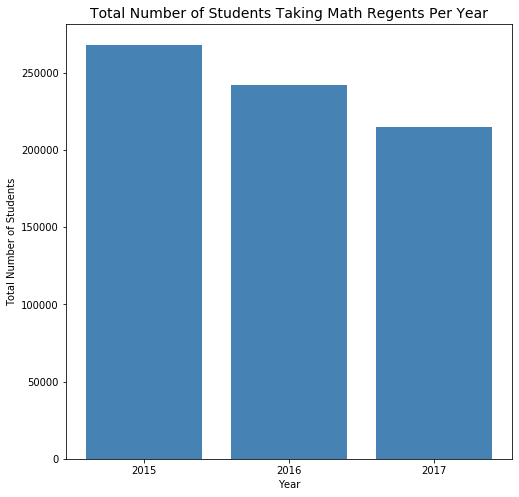

In [5]:
#Make a bar graph
year = ['2015', '2016', '2017']
plt.figure(figsize=(8,8))
plt.bar(year, total_by_year, color = 'steelblue')
plt.title("Total Number of Students Taking Math Regents Per Year", fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Total Number of Students')

In [6]:
#Calculate the change in total each year
total_year_list = total_by_year.tolist()
for indx in range(1, len(year)):
    dif = total_year_list[indx]-total_year_list[indx-1]
    print("Difference between", year[indx-1], "and", year[indx], "is", dif)

Difference between 2015 and 2016 is -26367
Difference between 2016 and 2017 is -27159


#### Hypothesis 2:
I can hypothesize that more students are passing their regents each year.  My numeric guess is that there is a 2% increase in passing students each year.  Note, to pass the regents you must score a 65 or higher.

Process: First, I am going to find the percent passed each year.  It is important that we used the passing rate (percent), because one could assume that with less people taking the regents, less people are passing.  So just looking at the total that passed would not help us see if there is improvement between each year.  After I find the passing rate for each year, I am going to visualize my findings using a bar graph.

Bonus: If I was presenting this to the New York City school superintendent, I think they would also want to know the passing rate by subject.  When I plotted the passing rate by subject, I learned that Geometry and Integrated Algebra did not have data for 2017. This could mean that these exams could have phased out. Further Common Core Algebra 2 does not have data for 2015.  This could mean that the test is a new examination. All the other subjects had an increase in passing rate, except Algebra 2/Trignometry.  It is worth noting that in 2014 they started to phase out Algebra2/Trigonometry, and make Common Core Algebra 2 the new regents associated with the algebra 2 course.

Conclusion: More students are passing their regents each year! Specifically, from 2015 to 2016 the passing rate increased by 2.37% (very close to my hypothesis) and from 2016 to 2017 the passing rate increased by 5.23%

In [14]:
#Calculate the percent of students passing
#Make a list of the Number of students passing each year
total_pass = year_groups['Number Scoring 65 or Above'].sum()
print(total_pass)
total_pass_list = total_pass.tolist()
#Make a for loop to calculate the passing rate of each year
percent_pass = []
for indx in range(len(total_pass_list)):
    pass_rate = round(((total_pass_list[indx] / total_year_list[indx]) * 100), 2 )
    print("In year ", year[indx], "the passing rate was ", pass_rate, "%")
    percent_pass.append(pass_rate)

Year
2015    148081.0
2016    139240.0
2017    134823.0
Name: Number Scoring 65 or Above, dtype: float64
In year  2015 the passing rate was  55.23 %
In year  2016 the passing rate was  57.6 %
In year  2017 the passing rate was  62.83 %


Text(0, 0.5, 'Percent of Students Passing')

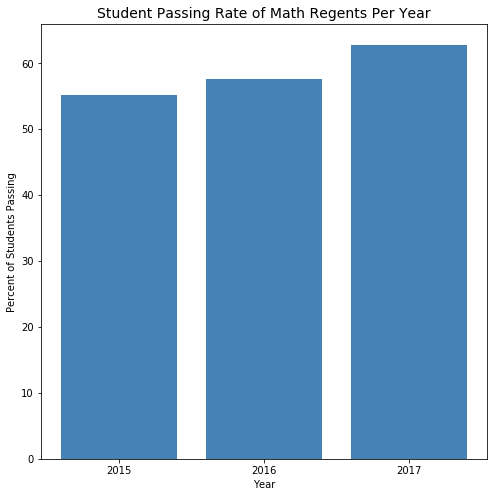

In [8]:
#Let's visualize with a bar graph
plt.figure(figsize=(8,8))
plt.bar(year, percent_pass, color = 'steelblue')
plt.title("Student Passing Rate of Math Regents Per Year", fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Percent of Students Passing')

In [9]:
#Calculate the change in pass rate each year
for indx in range(1, len(year)):
    dif = round(percent_pass[indx]-percent_pass[indx-1], 2)
    print("Difference between", year[indx-1], "and", year[indx], "passing rate is", dif, "%")

Difference between 2015 and 2016 passing rate is 2.37 %
Difference between 2016 and 2017 passing rate is 5.23 %


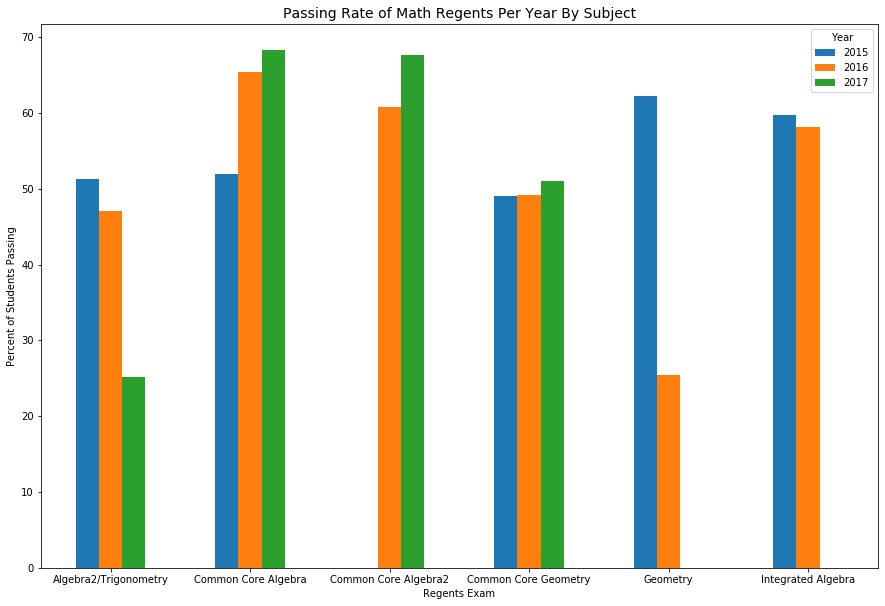

In [10]:
#Subject Passing Rate for Each Year
#Group by regents exam and year
group_year_regents = df.groupby(by=['Regents Exam','Year'])
group_year_regents.size()
#Find the sum of total test
total = group_year_regents['Total Tested'].sum()
#Find the sum of total passed
total_pass = group_year_regents['Number Scoring 65 or Above'].sum()
#Find the passing rate of each group
dec_pass = total_pass.divide(total)
per_pass = dec_pass * 100
per_pass

fig, ax = plt.subplots(figsize=(15,10))
per_pass.unstack().plot.bar(ax=ax)
plt.title("Passing Rate of Math Regents Per Year By Subject", fontsize = 14)
plt.ylabel('Percent of Students Passing')
_ = plt.xticks(rotation=0)

#### Hypothesis 3:
The data has the DBN of the schools which allows me to sort through the data by borough.  From this I can hypothesize that for each year, Manhattan has the highest passing rate, and the Bronx has the lowest passing rate.

Process: First I used the School DBN to make a new column in the data frame that listed the Borough that the school was located in.  Second I grouped by year and then Borough.  Then I calculate the passing rate for each borough for each year.  Finally, I displayed my findings in a bar graph.

Conclusion: in 2015 and 2017 Queens had the highest passing rate, and in 2016 Manhattan had the highest passing rate.  All three years, the Bronx had the lowest passing rate as I predicted in my hypothesis.  However, each year the passing rate in the Bronx did increase as can be seen in the bar graph.

##### Understanding the School DBN
Each school dbn has a letter in it.  The letter represents which borough the school is in.  Here is a key:

Brooklyn = K;
Bronx = X;
Queens = Q;
Manhattan = M;
Staten Island = R;

In [11]:
#Add New Column that gives the Borough of Each School
df['Borough']='NO'
df.loc[df['School DBN'].str.contains('M'), 'Borough'] = 'Manhattan'
df.loc[df['School DBN'].str.contains('K'), 'Borough'] = 'Brooklyn'
df.loc[df['School DBN'].str.contains('X'), 'Borough'] = 'Bronx'
df.loc[df['School DBN'].str.contains('Q'), 'Borough'] = 'Queens'
df.loc[df['School DBN'].str.contains('R'), 'Borough'] = 'Staten Island'

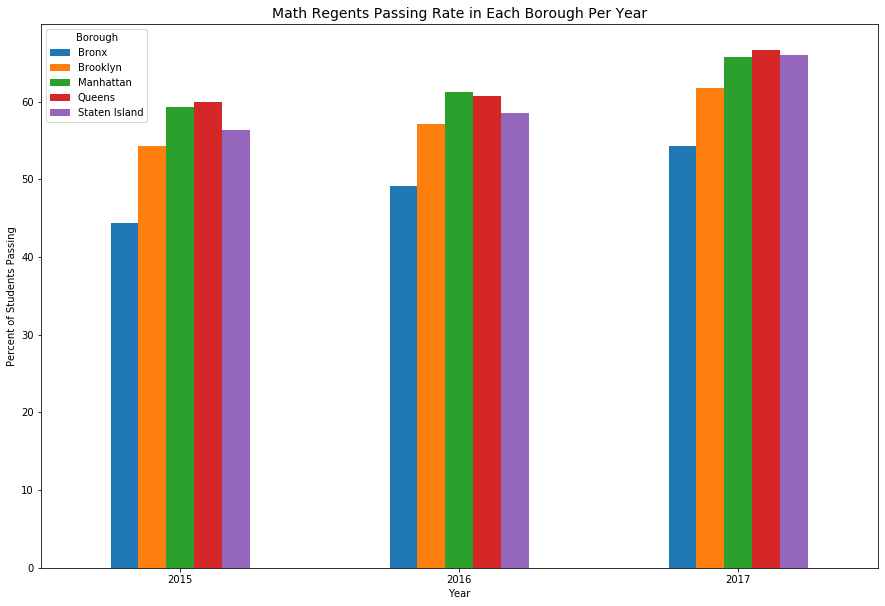

In [12]:
#Subject Passing Rate for Each Year
#Group by regents exam and year
group_year_borough = df.groupby(by=['Year','Borough'])
group_year_borough.size()
#Find the sum of total test
total = group_year_borough['Total Tested'].sum()
#Find the sum of total passed
total_pass = group_year_borough['Number Scoring 65 or Above'].sum()
#Find the passing rate of each group
dec_pass = total_pass.divide(total)
per_pass = dec_pass * 100
#Plot data in a bar graph
fig, ax = plt.subplots(figsize=(15,10))
per_pass.unstack().plot.bar(ax=ax)
plt.title("Math Regents Passing Rate in Each Borough Per Year", fontsize = 14)
plt.ylabel('Percent of Students Passing')
_ = plt.xticks(rotation=0)

#### What I learned Doing this Project

I enjoyed completing this project more than the first.  The first thing that I learned/did differently than the first project was I was able to implement the group by function a lot!  I feel that it was much more efficient than making different dataframes out of the main dataframe as I would have done before this.  Further, I learned that sometimes a percentage rate is better than a total number when trying to display the proper information to the reader.  If I would have plotted total passed instead of the passing rate, it would appear to the reader that less students are passing each year.  While this may be true a reason for this is that less students are taking the regents each year.  However when looking at the percent passed, you can see that more students are passing out of the students who are taking the regents.  I also learned how to work with pandas series.  I learned that you can group by more than one thing, and then plot the resulting pandas series quite easily.  I also learned that you can preform mathematic manipulation of a series, for example dividing one series by another, or multiplying the numbers in a series by a constant.  I also really started thinking about how to suporrt or invalidate hypothesis.  I learned to think about what mathematical manipulations and visualizations I need to show in order to support or invalidate hypothesis.